<a href="https://colab.research.google.com/github/PaulToronto/Johns-Hopkins-Coursera-Applied-Calculus-With-Python/blob/main/2_2_Exponential_and_Logarithmic_Functions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2.2 Exponential and Logarithmic Functions

In [1]:
import sympy as sym
from math import isnan
import numpy as np

sym.init_printing(use_unicode=True)

In [2]:
def display_f_of_x(str_expr):
    f = sym.parse_expr(str_expr)

    x = f.free_symbols.pop()

    sym.plot(f, 
            line_color='red',
            title='$f(x) = ' + sym.latex(f) + '$\n'
            )

    x_intercepts = list()
    for soln in sym.solve(f):
        if soln.is_real:
            x_intercepts.append(soln)
    x_intercepts = None if len(x_intercepts) == 0 else x_intercepts


    y_intercept = None if isnan(f.subs(x, 0)) else f.subs(x, 0)

    slope = f.diff()
    
    domain = sym.calculus.util.continuous_domain(f, x, sym.S.Reals)

    try:
        range = sym.calculus.util.function_range(f, x, sym.S.Reals)
    except NotImplementedError:
        range = 'Not found'

    print('\nX-intercepts:')
    display(x_intercepts)
    print('\nY-intercept:')
    display(y_intercept)
    print('\nSlope (derivative):')
    display(slope)
    print('\nDomain:')
    display(domain)
    print('\nRange:')
    display(range)

## 2.2.1 Theory: Exponential Functions

### Definition

A function, $f(x)$, is **exponential** if it is of the form $f(x) = a^{x}, a > 0$.

- Note that $f(x) = x^{2}$ is not an exponential function, it is a power function

### Example: $f(x) = 2^{x}$

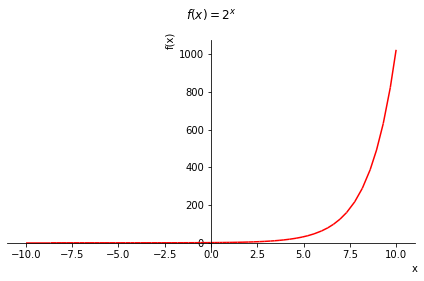


X-intercepts:


None


Y-intercept:



Slope (derivative):



Domain:



Range:


In [3]:
display_f_of_x('2**x')

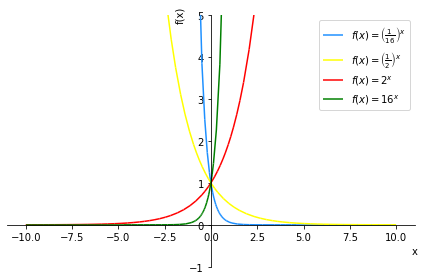

In [4]:
x = sym.symbols('x')

expr1 = sym.Rational(1, 16)**x
expr2 = sym.Rational(1, 2)**x
expr3 = 2**x 
expr4 = 16**x

fig = sym.plot(expr1, expr2, expr3, expr4,
               ylim=[-1, 5],
               legend=True,
               show=False)

fig[0].line_color = 'dodgerblue'
fig[0].label = '$f(x) = ' + sym.latex(expr1) + '$'
 
fig[1].line_color = 'yellow'
fig[1].label = '$f(x) = ' + sym.latex(expr2) + '$'

fig[2].line_color = 'red'
fig[2].label = '$f(x) = ' + sym.latex(expr3) + '$'

fig[3].line_color='green'
fig[3].label = '$f(x) = ' + sym.latex(expr4) + '$'

fig.show()

### Three Types of Exponential Functions

1. $0 < a < 1$
2. a = 1
3. 

In [5]:
def plot_many(*args):
    p = sym.plot(show=False, ylim=[-1, 5], legend=True)
    for i, arg in enumerate(*args):
        p.append(sym.plot(arg, show=False)[0])
        p[i].label = '$f(x) = ' + sym.latex(arg) + '$'
    
    p[0].line_color = 'red'
    p[1].line_color = 'lime'
    p[len(*args) - 1].line_color = 'orange'
    p.show()

#### Type 1: $0 < a < 1$

- exponential decay
- this is a decreasing function
- y-intercept is always $1$
- horizontal asymptote at $y = 0$

In [6]:
x = sym.symbols('x')
exprs = [sym.Rational(n, 10)**x for n in (np.linspace(1, 9, 9))]
exprs

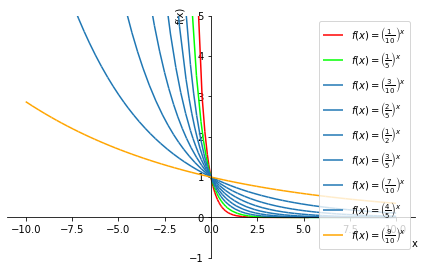

In [7]:
plot_many(exprs)

#### Type 2: $a = 1$

- not really exponential
- we don't study this one

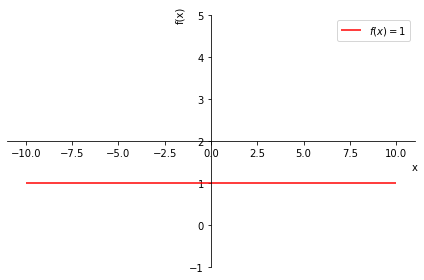

In [8]:
p = sym.plot(1**x, show=False, legend=True, ylim=[-1, 5], axis_center='center')
p[0].label = '$f(x) = ' + sym.latex(1**x) + '$'
p[0].line_color = 'red'

p.show()

#### Type 3: $a > 0$

- exponential growth
- this is an increasing function
- y-intercept is always $1$
- horizontal asymptote at $y = 0$

In [9]:
x = sym.symbols('x')
exprs = [a**x for a in (np.linspace(2, 10, 9))]
exprs

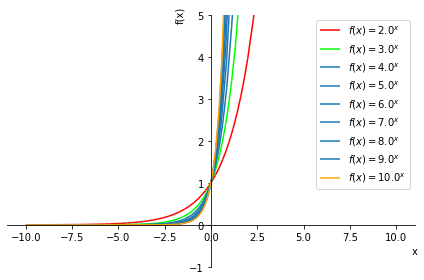

In [10]:
plot_many(exprs)

### Example: $f(x) = -2^{-x} - 1$

Let's plot this in steps:

#### Step 1: Plot $f(x) = 2^x$

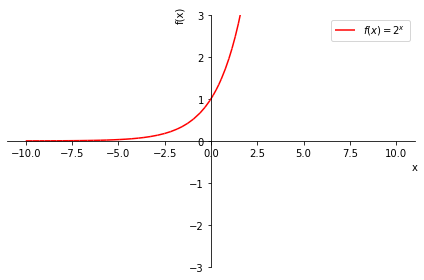

In [11]:
p = sym.plot(2**x, legend=True, show=False, ylim=[-3, 3])

p[0].label = '$f(x) = ' + sym.latex(2**x) + '$'
p[0].line_color = 'red'

p.show()

#### Step 2: Plot $f(x) = 2^{-x}$

- When $x$ is replaced with $-x$ we have a refelection in the y-axis.

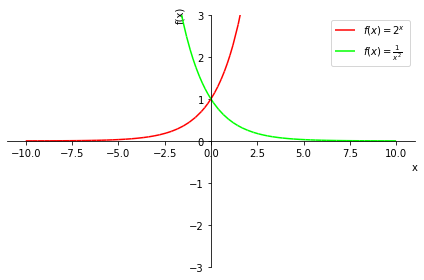

In [12]:
p.append(sym.plot(2**(-x), show=False)[0])

p[1].label = '$f(x) = ' + sym.latex(x**(-2)) + '$'
p[1].line_color = 'lime'

p.show()

#### Step 3: Plot $f(x) = -2^{-x}$

- When we negate the function, replacing $y$ with $-y$ we have a reflection in the x-axis.

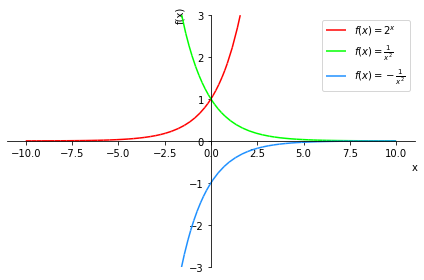

In [13]:
p.append(sym.plot(-2**(-x), show=False)[0])

p[2].label = '$f(x) = ' + sym.latex(-x**(-2)) + '$'
p[2].line_color = 'dodgerblue'

p.show()

#### Step 4: Plot $f(x) = -2^{-x}$

- Subtracting 1 from the function shifts the graph down by $1$ unit. 

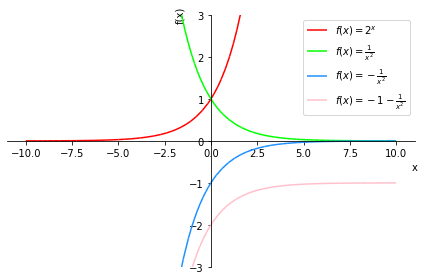

In [14]:
p.append(sym.plot(-2**(-x) - 1, show=False)[0])

p[3].label = '$f(x) = ' + sym.latex(-x**(-2) - 1) + '$'
p[3].line_color = 'pink'

p.show()

### Example: $f(x) = e^{x}$

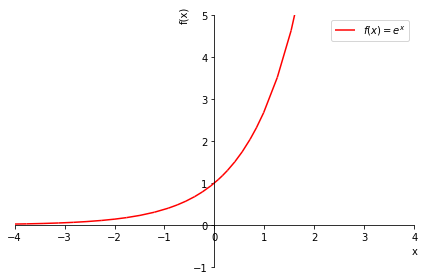

In [15]:
sym.plot(sym.exp(x), 
         ylim=[-1, 5], xlim=[-4, 4],
         legend=True, 
         label= '$f(x) = ' + sym.latex(sym.exp(x)) + '$',
         line_color='red',
         show=True);

### Example: Find the domain of $f(x) = \frac{1 - e^{x}}{1 - e^{1 - x^{2}}}$

In [16]:
# the denominator can't be equal to 0
# solve for x when the denominator is 0
sym.solve(1 - sym.exp(1 - x**2))

The domain is expressed below in 3 different ways:

Domain: $\left(-\infty, -1\right) \cup \left(-1, 1\right) \cup \left(1, \infty\right)$




Domain: $\{x \in \mathbb{R}\ : x \ne -1\ and\: x \ne 1\}$

Domain: $\mathbb{R} \backslash \{\pm1\}$

### Example: $f(x) = 5^{x}$

Find the `Difference Quotient`

$
\begin{align}
\frac{f\left(x + h\right) - f\left(x\right)}{h} 
&= \frac{5^{x + h} - 5^{x}}{h} \\
&= \frac{5^{x} 5^{h} - 5^{x}}{h} \\
&= \frac{5^{x}\left(5^{h} - 1\right)}{h}
\end{align}
$

### $f(x) = \frac{1 - e^{\frac{1}{x}}}{1 + e^{\frac{1}{x}}}$ is an odd function. True or False? 

$
\begin{align}
f(-x) &= \frac{1 - e^{\frac{1}{-x}}}{1 + e^{\frac{1}{-x}}} \\
&= \frac{1 - e^{-x^{-1}}}{1 + e^{-x^{-1}}}
\end{align}
$

In [17]:
# @16:50